In [1]:
from scipy.io import loadmat, whosmat
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
import os

In [32]:
def build_dictionaries(mess):

    discharge, charge, impedance = {}, {}, {}

    for i, element in enumerate(mess):

        step = element[0][0]

        if step == 'discharge':
            discharge[str(i)] = {}
            discharge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            discharge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            discharge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            discharge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            discharge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            discharge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            discharge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            discharge[str(i)]["time"] = data[0][0][5][0].tolist()
            discharge[str(i)]["capacity"] = data[0][0][6].tolist() # SOC
            
            

        if step == 'charge':
            charge[str(i)] = {}
            charge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            charge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            charge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            charge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            charge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            charge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            charge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            charge[str(i)]["time"] = data[0][0][5][0].tolist()

        if step == 'impedance':
            impedance[str(i)] = {}
            impedance[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            impedance[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            impedance[str(i)]["sense_current"] = {}
            impedance[str(i)]["battery_current"] = {}
            impedance[str(i)]["current_ratio"] = {}
            impedance[str(i)]["battery_impedance"] = {}
            impedance[str(i)]["rectified_impedance"] = {}

            impedance[str(i)]["sense_current"]["real"] = np.real(data[0][0][0][0]).tolist()
            impedance[str(i)]["sense_current"]["imag"] = np.imag(data[0][0][0][0]).tolist()

            impedance[str(i)]["battery_current"]["real"] = np.real(data[0][0][1][0]).tolist()
            impedance[str(i)]["battery_current"]["imag"] = np.imag(data[0][0][1][0]).tolist()

            impedance[str(i)]["current_ratio"]["real"] = np.real(data[0][0][2][0]).tolist()
            impedance[str(i)]["current_ratio"]["imag"] = np.imag(data[0][0][2][0]).tolist()

            impedance[str(i)]["battery_impedance"]["real"] = np.real(data[0][0][3]).tolist()
            impedance[str(i)]["battery_impedance"]["imag"] = np.imag(data[0][0][3]).tolist()

            impedance[str(i)]["rectified_impedance"]["real"] = np.real(data[0][0][4]).tolist()
            impedance[str(i)]["rectified_impedance"]["imag"] = np.imag(data[0][0][4]).tolist()

            impedance[str(i)]["re"] = float(data[0][0][5][0][0])
            impedance[str(i)]["rct"] = float(data[0][0][6][0][0])
            
    return discharge, charge, impedance

In [4]:
def save_json(dictionary, name):
    with open(name + '.json', 'w') as f:
        json.dump(dictionary, f, indent=4)

In [33]:
folder = './BatteryAgingData'
filenames = [f for f in os.listdir(folder) if f.endswith('.mat')]

for filename in filenames:
    name = filename.split('.mat')[0]
    print(name)
    struct = loadmat(folder + '/' + filename)
    mess = struct[name][0][0][0][0]
    
    discharge, charge, impedance = build_dictionaries(mess)
    
    save_json(discharge, name + '_discharge')
    save_json(charge, name + '_charge')    
    save_json(impedance, name + '_impedance')

B0005
B0006
B0007
B0018


In [34]:
with open('./B0005_impedance.json') as f:    
    impedance_data = json.load(f)
    
with open('./B0005_discharge.json') as f:    
    discharge_data = json.load(f)
with open('./B0005_charge.json') as f:    
    charge_data = json.load(f)

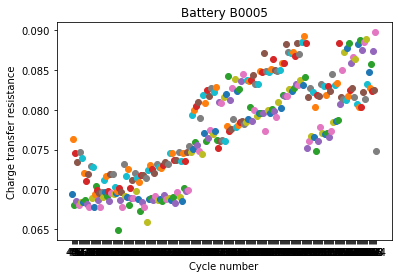

In [7]:
for cycle in impedance_data.keys():
    plt.plot(cycle, impedance_data[cycle]["rct"], 'o')
    plt.ylabel('Charge transfer resistance')
    plt.xlabel('Cycle number')
    plt.title('Battery B0005')
plt.show()

In [2]:


for cycle in discharge_data.keys():
    if int(cycle)==1 :
        plt.plot(discharge_data[cycle]["time"], discharge_data[cycle]["voltage_battery"], '-')
        plt.ylabel('Voltage')
        plt.xlabel('Time (s)')
plt.show()



NameError: name 'discharge_data' is not defined

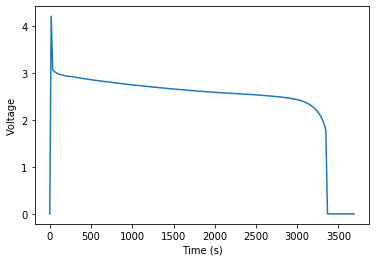

In [31]:

for cycle in discharge_data.keys():
    if int(cycle)==1 :
        plt.plot(discharge_data[cycle]["time"], discharge_data[cycle]["voltage_load"], '-')
        plt.ylabel('Voltage')
        plt.xlabel('Time (s)')
plt.show()


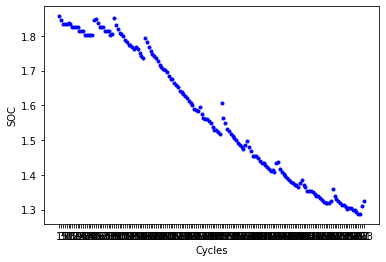

In [36]:
for cycle in discharge_data.keys():
    #if (int(cycle)<500 and int(cycle)>310):
        plt.plot(cycle,discharge_data[cycle]["capacity"], 'b.')
        plt.ylabel('SOC')
        plt.xlabel('Cycles')
plt.show()


In [10]:
discharge_data.keys()

dict_keys(['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '24', '26', '28', '30', '32', '34', '36', '38', '41', '45', '49', '53', '57', '61', '65', '69', '73', '77', '81', '85', '89', '93', '97', '101', '105', '109', '113', '117', '121', '125', '129', '133', '135', '139', '143', '147', '149', '153', '157', '161', '165', '169', '173', '177', '181', '185', '189', '193', '197', '201', '205', '209', '213', '215', '219', '223', '227', '231', '235', '239', '243', '247', '251', '255', '259', '263', '265', '269', '273', '277', '281', '285', '289', '293', '297', '301', '305', '309', '312', '315', '319', '323', '327', '331', '335', '339', '343', '347', '351', '355', '359', '363', '366', '370', '374', '378', '382', '386', '390', '394', '398', '402', '406', '410', '414', '418', '422', '426', '430', '432', '436', '440', '444', '448', '452', '456', '460', '464', '468', '472', '476', '480', '482', '484', '488', '492', '496', '500', '504', '508', '512', '516', '520', '524', '528', '532',

In [11]:
charge_data.keys()

dict_keys(['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '23', '25', '27', '29', '31', '33', '35', '37', '39', '43', '47', '51', '55', '59', '63', '67', '71', '75', '79', '83', '84', '87', '91', '95', '99', '103', '107', '111', '115', '119', '123', '127', '131', '134', '137', '141', '145', '148', '151', '155', '159', '163', '167', '171', '175', '179', '183', '187', '191', '195', '199', '203', '207', '211', '214', '217', '221', '225', '229', '233', '237', '241', '245', '249', '253', '257', '261', '264', '267', '271', '275', '279', '283', '287', '291', '295', '299', '303', '307', '314', '317', '321', '325', '329', '333', '337', '341', '345', '349', '353', '357', '361', '365', '368', '372', '376', '380', '384', '388', '392', '396', '400', '404', '408', '412', '416', '420', '424', '428', '431', '434', '438', '442', '446', '450', '454', '458', '462', '466', '470', '474', '478', '481', '483', '486', '490', '494', '498', '502', '506', '510', '514', '518', '522', '526', '5

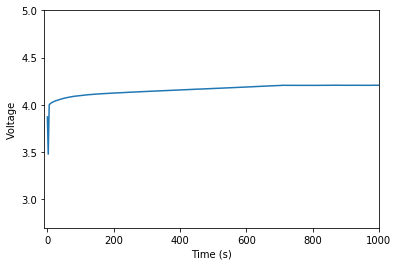

In [26]:

for cycle in charge_data.keys():
    if int(cycle)<=1:
        plt.plot(charge_data[cycle]["time"], charge_data[cycle]["voltage_battery"], '-',label=cycle)
        plt.ylabel('Voltage')
        #plt.legend(loc='lower right',fontsize='small',ncol=10)
        plt.xlabel('Time (s)')
        _ =plt.axis([-10,1000,2.7,5])
plt.show()

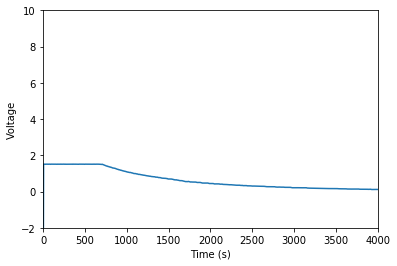

In [21]:
for cycle in charge_data.keys():
    if int(cycle)<=1:
        plt.plot(charge_data[cycle]["time"], charge_data[cycle]["current_battery"], '-',label=cycle)
        plt.ylabel('Voltage')
        #plt.legend(loc='lower right',fontsize='small',ncol=10)
        plt.xlabel('Time (s)')
        _ =plt.axis([-2,4000,-2,10])
plt.show()

In [13]:
impedance_data.keys()

dict_keys(['40', '42', '44', '46', '48', '50', '52', '54', '56', '58', '60', '62', '64', '66', '68', '70', '72', '74', '76', '78', '80', '82', '86', '88', '90', '92', '94', '96', '98', '100', '102', '104', '106', '108', '110', '112', '114', '116', '118', '120', '122', '124', '126', '128', '130', '132', '136', '138', '140', '142', '144', '146', '150', '152', '154', '156', '158', '160', '162', '164', '166', '168', '170', '172', '174', '176', '178', '180', '182', '184', '186', '188', '190', '192', '194', '196', '198', '200', '202', '204', '206', '208', '210', '212', '216', '218', '220', '222', '224', '226', '228', '230', '232', '234', '236', '238', '240', '242', '244', '246', '248', '250', '252', '254', '256', '258', '260', '262', '266', '268', '270', '272', '274', '276', '278', '280', '282', '284', '286', '288', '290', '292', '294', '296', '298', '300', '302', '304', '306', '308', '310', '311', '313', '316', '318', '320', '322', '324', '326', '328', '330', '332', '334', '336', '338', '34

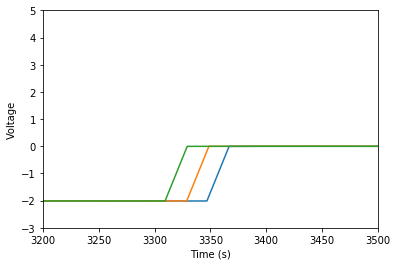

In [89]:
for cycle in discharge_data.keys():
    if int(cycle)<6:
        plt.plot(discharge_data[cycle]["time"], discharge_data[cycle]["current_battery"], '-')
        plt.ylabel('Voltage')
        plt.xlabel('Time (s)')
        _ =plt.axis([3200,3500,-3,5])
plt.show()

In [40]:
for cycle in discharge_data.keys():
    if cycle==2:
        discharge_data[cycle]["capacity"].shape
discharge_data[cycle]["capacity"]

[[1.3250793286429356]]